In [1]:
from pydynverse.wrap import wrap_expression, infer_trajectory, add_dimred, add_prior_information
from pydynverse.methods import ti_comp1, ti_slingshot, ti_monocle_ddrtree, ti_mst, ti_scuba, ti_angle, ti_grandprix, ti_paga
from pydynverse.plot import plot_dimred
from pydynverse.dimred import dimred_mds

from pydynverse import logger

logger.setLevel("DEBUG")

In [2]:
# 1. 准备数据(wrap)
# 运行R脚本获得数据，为R对象
import rpy2.robjects as ro
from pydynverse.util import rpy2_read # 导入对应的装饰器， 实现数据自动转换
r_script = """
library(dyno)
data("fibroblast_reprogramming_treutlein")
fibroblast_reprogramming_treutlein
"""
fibroblast_reprogramming_treutlein = ro.r(r_script)

# 封装数据
dataset = wrap_expression(
    counts=fibroblast_reprogramming_treutlein["counts"],
    expression=fibroblast_reprogramming_treutlein["expression"]
)
logger.info(f"AnnData dataset:\n{dataset}")
logger.info("Dataset loading finished")

R[write to console]: 载入需要的程辑包：dynfeature

R[write to console]: 载入需要的程辑包：dynguidelines

R[write to console]: 载入需要的程辑包：dynmethods

R[write to console]: 载入需要的程辑包：dynplot

R[write to console]: 载入需要的程辑包：dynwrap



[2024年12月02日 16时17分46秒] DEBUG    Dataset created: {'id': '20241202_161746__data_wrapper__ukEPHqT2QW',        
                                       'cell_ids': ['1_iN1_C01', '1_iN1_C02', '1_iN1_C03', '1_iN1_C04',            
                                       '1_iN1_C05', '1_iN1_C07', '1_iN1_C08', '1_iN1_C09', '1_iN1_C10',            
                                       '1_iN1_C11', '1_iN1_C12', '1_iN1_C13', '1_iN1_C14', '1_iN1_C15',            
                                       '1_iN1_C16', '1_iN1_C17', '1_iN1_C19', '1_iN1_C20', '1_iN1_C21',            
                                       '1_iN1_C22', '1_iN1_C23', '1_iN1_C25', '1_iN1_C26', '1_iN1_C27',            
                                       '1_iN1_C29', '1_iN1_C30', '1_iN1_C31', '1_iN1_C33', '1_iN1_C34',            
                                       '1_iN1_C35', '1_iN1_C36', '1_iN1_C37', '1_iN1_C38', '1_iN1_C40',            
                                       '1_iN1_C41', '1_iN1_C42', '1_iN1_C43', 

In [3]:
# 2. 选择方法(method), 目前stuba和grandprix有点问题
# methods_selected_list = [ti_comp1(), ti_slingshot(), ti_monocle_ddrtree(), ti_mst(), ti_scuba(), ti_angle(), ti_grandprix()]
methods_selected_list = [ti_slingshot()]
methods_selected = methods_selected_list[0]
logger.info(f"Methods {methods_selected} selecting finished")

                        DEBUG    Docker image(dynverse/ti_slingshot:v1.0.3) loaded                                 
[2024年12月02日 16时17分47秒] INFO     Methods {'method': {'id': 'slingshot', 'name': 'Slingshot', 'source':       
                                       'tool', 'platform': 'R', 'license': 'Artistic-2.0', 'url':                  
                                       'https://github.com/kstreet13/slingshot', 'authors': [{'given': 'Kelly',    
                                       'family': 'Street', 'email': 'street.kelly@gmail.com', 'github':            
                                       'kstreet13'}, {'given': 'Sandrine', 'family': 'Dudoit', 'email':            
                                       'sandrine@stat.berkeley.edu', 'ORCID': '0000-0002-6069-8629', 'github':     
                                       'sandrinedudoit'}]}, 'wrapper': {'type': 'trajectory', 'topology_inference':
                                       'free', 'trajectory_types': ['linear', 

In [4]:
dataset["expression"]

<Compressed Sparse Column sparse matrix of dtype 'float64'
	with 502036 stored elements and shape (392, 2000)>

In [5]:
# 3. 运行方法(wrap)
# add_prior_information(dataset, end_n=3)  # 运行grandprix需要的先验知识
model = infer_trajectory(dataset, methods_selected)
logger.info(f"Methods executing finished, model: {model}")

                        WARNING                                                                                    
                                                                                                                   
                                                        Prior information start_id,end_id is optional, but missing 
                                 from dataset 20241202_161746__data_wrapper__ukEPHqT2QW.                           
                                                                                                                   
                                                        Will not give this prior to method.                        
                                                                                                                   
                        DEBUG    Temp wd: /tmp/tmpl0fqzxcs                                                         
                        DEBUG    Save json successfully, path: /tmp/tmpl

[2024年12月02日 16时18分32秒] INFO     Coloring by grouping                                                        
                        INFO     Result plotting finished                                                          


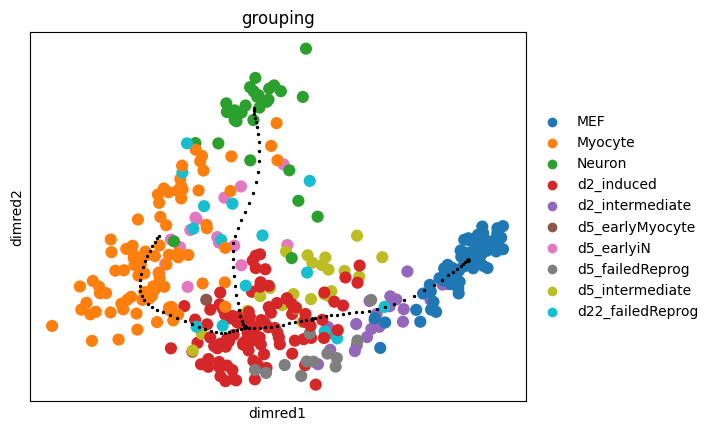

In [7]:
# 4. 绘制轨迹(dimred+plot)
# model = add_dimred(model, dimred_mds,  expression_source=dataset["expression"])  # 提取降维结果, 直接从docker输出容器获得
plot_dimred(model, expression_source=dataset["expression"], grouping=list(fibroblast_reprogramming_treutlein["grouping"]))
logger.info("Result plotting finished")